<a href="https://colab.research.google.com/github/koppisettisravya/FML-lab/blob/main/LogisticRegression_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
titanic = pd.read_csv('/content/Titanic (3).csv')

In [4]:
titanic.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [5]:
titanic.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [6]:
titanic.describe

<bound method NDFrame.describe of         sex   age  sibsp  parch     fare embarked   class    who  alone  \
0      male  22.0      1      0   7.2500        S   Third    man  False   
1    female  38.0      1      0  71.2833        C   First  woman  False   
2    female  26.0      0      0   7.9250        S   Third  woman   True   
3    female  35.0      1      0  53.1000        S   First  woman  False   
4      male  35.0      0      0   8.0500        S   Third    man   True   
..      ...   ...    ...    ...      ...      ...     ...    ...    ...   
886    male  27.0      0      0  13.0000        S  Second    man   True   
887  female  19.0      0      0  30.0000        S   First  woman   True   
888  female   NaN      1      2  23.4500        S   Third  woman  False   
889    male  26.0      0      0  30.0000        C   First    man   True   
890    male  32.0      0      0   7.7500        Q   Third    man   True   

     survived  
0           0  
1           1  
2           1  
3

In [7]:
titanic.shape

(891, 10)

In [8]:
titanic=titanic.dropna()

In [9]:
titanic.shape

(712, 10)

In [10]:
X=titanic.iloc[:,:9]
Y=titanic.iloc[:,8]

In [11]:
X.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone'],
      dtype='object')

In [12]:
X['sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
le = LabelEncoder()

In [14]:
X['sex']= le.fit_transform(X['sex'])

In [15]:
X['embarked']=le.fit_transform(X['embarked'])

In [16]:
X['class']=le.fit_transform(X['class'])

In [17]:
X['who']=le.fit_transform(X['who'])

In [18]:
X['alone']=le.fit_transform(X['alone'])

In [20]:
X.shape, Y.shape

((712, 9), (712,))

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=46)

In [23]:
X_train

,sex,age,sibsp,parch,fare,embarked,class,who,alone
877,1,19.0,0,0,7.8958,2,2,1,1
782,1,29.0,0,0,30.0000,2,0,1,1
67,1,19.0,0,0,8.1583,2,2,1,1
441,1,20.0,0,0,9.5000,2,2,1,1
494,1,21.0,0,0,8.0500,2,2,1,1
...,...,...,...,...,...,...,...,...,...
508,1,28.0,0,0,22.5250,2,2,1,1
558,0,39.0,1,1,79.6500,2,0,2,0
467,1,56.0,0,0,26.5500,2,0,1,1
698,1,49.0,1,1,110.8833,0,0,1,0


In [24]:
Y_train.shape

(498,)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [27]:
model = LogisticRegression(C=0.3)
model.fit(X_train,Y_train)

LogisticRegression(C=0.3)

In [28]:
Y_train_pred=model.predict(X_train)

In [29]:
X_test = scaler.fit_transform(X_test)

In [30]:
Y_test_pred=model.predict(X_test)

In [32]:
model.score(X_train,Y_train)

1.0

In [34]:
model.score(X_test,Y_test_pred)

1.0

In [36]:
cm=confusion_matrix(Y_test, Y_test_pred)

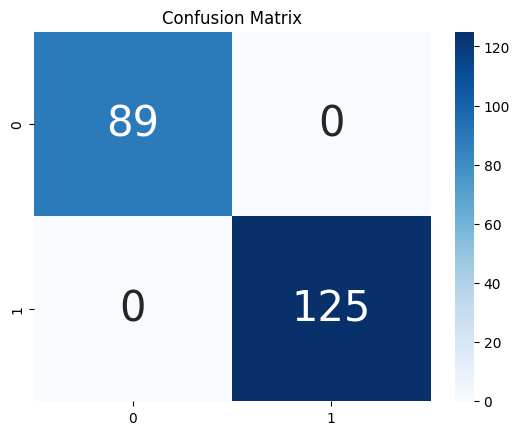

In [37]:
import seaborn as sns
ax=plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

In [39]:
#more comprehensive report on the classification 
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        89
        True       1.00      1.00      1.00       125

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

